In [2]:
import numpy as np
from vpi.io import *
from collections import *

In [3]:
def neighbors_8(f, pto):
    list_of_neighbors = []
    n1, n2 = f.shape
    if (pto[0] - 1) >= 0:
        list_of_neighbors.append((pto[0]-1, pto[1]))
        if (pto[1] -1) >=0:
            list_of_neighbors.append((pto[0]-1, pto[1]-1))
        if (pto[1] + 1) < n2:
            list_of_neighbors.append((pto[0]-1, pto[1]+1))
    if (pto[1] - 1) >= 0:
        list_of_neighbors.append((pto[0], pto[1]-1))
        if (pto[0] + 1) < n1:
            list_of_neighbors.append((pto[0]+1, pto[1]-1))
    if (pto[0] + 1) < n1:
        list_of_neighbors.append((pto[0]+1, pto[1]))
        if (pto[1] + 1) < n2:
            list_of_neighbors.append((pto[0]+1, pto[1]+1))
    if (pto[1] + 1) < n2:
        list_of_neighbors.append((pto[0], pto[1]+1))
    return list_of_neighbors           

In [11]:
def labeling(f, color):
    g = np.zeros(f.shape).astype(int)
    label = 0
    queue = deque()
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):
            if (f[i,j] == color and g[i,j] == 0):
                queue.append((i,j)) #insere no lado direito
                label = label + 1 
                g[i,j] = label
                while queue:
                    proximo = queue.popleft() #remove no lado esquerdo
                    for n in neighbors_8(f, proximo):
                        if (f[n] == color and g[n] == 0):
                            g[n] = label
                            queue.append(n)           
    return g

In [12]:
def count_dobradica(f):
    holes = labeling(f, 255).max()
    return holes

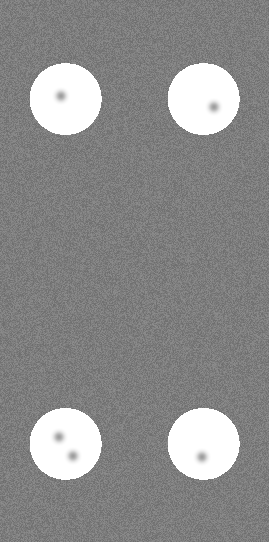

4 buracos


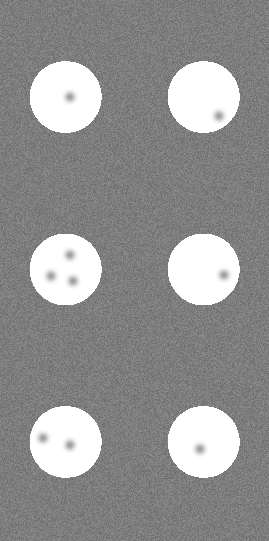

6 buracos


In [13]:
dobra1 = read_image("images/filled_dobradica_04_gray_gray.png")
dobra2 = read_image("images/filled_dobradica_06_gray_gray.png")
c1 = count_dobradica(dobra1)
c2 = count_dobradica(dobra2)
display_image(dobra1)
print(c1, "buracos")
display_image(dobra2)
print(c2, "buracos")